In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

Loading Data

In [3]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='ISO-8859-1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


# Exploratory Data Analysis (EDA) and Cleaning

In [4]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [6]:
# Drop the entirely null column
df = df.drop(columns=['TIDAL Popularity'])

Convert object dtype to float and drop all commas/other characters

In [7]:
cols_to_convert = [
    'All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 
    'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 
    'TikTok Posts', 'TikTok Likes', 'TikTok Views', 
    'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 
    'Soundcloud Streams', 'Shazam Counts'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(',', '', regex=False).str.replace(r'[^\d.]', '', regex=True),
        errors='coerce'
    )


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

Missing Value Imutation

In [9]:
imputation_cols = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
                    'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Views', 
                    'AirPlay Spins', 'Shazam Counts']

# 1. Impute missing values with the median
for col in imputation_cols:
    median_val = df[col].median()
    df.fillna({col: median_val}, inplace=True)
    #df[col].fillna(median_val, inplace=True)

# 2. Convert 'Release Date' to datetime objects
df['Release Date'] = pd.to_datetime(df['Release Date'])

# 3. Create a 'Release Year' feature for easier analysis
df['Release Year'] = df['Release Date'].dt.year


In [10]:
# 4. Check the remaining missing values (primarily social media/less common platforms)
print("\nRemaining Missing Values (Post-Imputation):")
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).to_markdown())

# 5. Display the descriptive statistics for the newly cleaned key metrics
print("\nDescriptive Statistics for Key Metrics:")
print(df[imputation_cols].describe().T.to_markdown(numalign='left', stralign='left'))


Remaining Missing Values (Post-Imputation):
|                            |    0 |
|:---------------------------|-----:|
| Soundcloud Streams         | 3333 |
| SiriusXM Spins             | 2123 |
| Pandora Track Stations     | 1268 |
| TikTok Posts               | 1173 |
| Pandora Streams            | 1106 |
| Amazon Playlist Count      | 1055 |
| YouTube Playlist Reach     | 1009 |
| TikTok Likes               |  980 |
| Deezer Playlist Reach      |  928 |
| Deezer Playlist Count      |  921 |
| Apple Music Playlist Count |  561 |
| Artist                     |    5 |

Descriptive Statistics for Key Metrics:
|                        | count   | mean        | std         | min   | 25%         | 50%         | 75%         | max         |
|:-----------------------|:--------|:------------|:------------|:------|:------------|:------------|:------------|:------------|
| Spotify Streams        | 4600    | 4.42289e+08 | 5.32758e+08 | 1071  | 7.31792e+07 | 2.39851e+08 | 6.11356e+08 | 4.28147e+

# Analysing Data

/tmp/ipykernel_183171/3229120141.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_183171/3229120141.py:11: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.



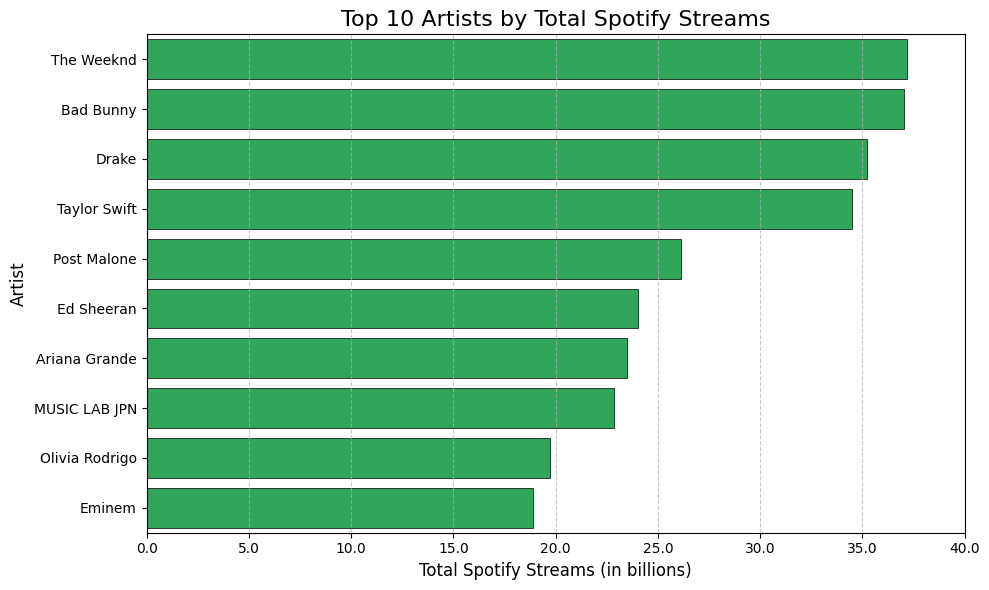

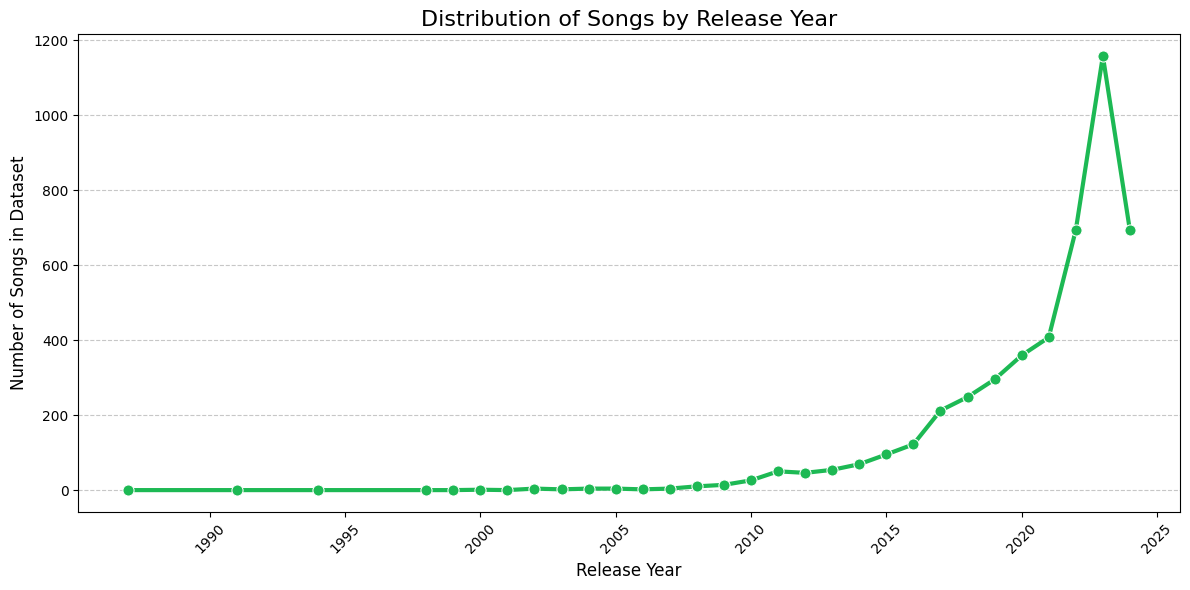

| Artist         | Spotify Streams   |
|:---------------|:------------------|
| The Weeknd     | 3.71884e+10       |
| Bad Bunny      | 3.70548e+10       |
| Drake          | 3.5202e+10        |
| Taylor Swift   | 3.44708e+10       |
| Post Malone    | 2.61375e+10       |
| Ed Sheeran     | 2.40149e+10       |
| Ariana Grande  | 2.3465e+10        |
| MUSIC LAB JPN  | 2.28667e+10       |
| Olivia Rodrigo | 1.97292e+10       |
| Eminem         | 1.88789e+10       |
Visualizations saved: top_10_artists_streams.png and songs_by_release_year.png


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a consistent color for visualization
primary_color = '#1DB954' # Spotify Green

# --- 1. Top 10 Artists by Total Streams ---
top_artists = df.groupby('Artist')['Spotify Streams'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    y='Artist',
    x='Spotify Streams',
    data=top_artists,
    palette=[primary_color],
    legend=False,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Top 10 Artists by Total Spotify Streams', fontsize=16)
plt.xlabel('Total Spotify Streams (in billions)', fontsize=12)
# Convert x-axis labels to billions for readability
plt.xticks(
    ticks=plt.gca().get_xticks(),
    labels=[f'{x/1e9:.1f}' for x in plt.gca().get_xticks()]
)
plt.ylabel('Artist', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('top_10_artists_streams.png')
plt.show()
plt.close()

# --- 2. Distribution by Release Year ---
year_counts = df['Release Year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Release Year', 'Song Count']

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Release Year',
    y='Song Count',
    data=year_counts,
    color=primary_color,
    marker='o',
    markersize=8,
    linewidth=3
)
plt.title('Distribution of Songs by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Songs in Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#plt.savefig('songs_by_release_year.png')
plt.close()

print(top_artists.to_markdown(index=False, numalign='left', stralign='left'))
print("Visualizations saved: top_10_artists_streams.png and songs_by_release_year.png")

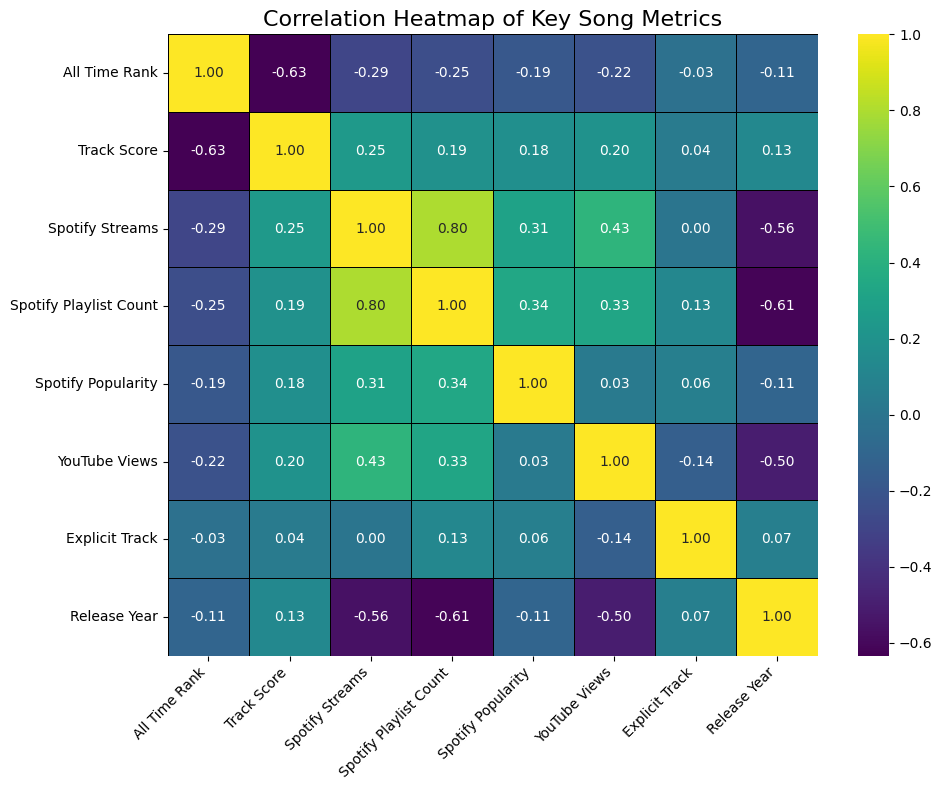

In [12]:
primary_color = '#1DB954'

# --- 1. Select Key Numerical Columns for Correlation ---
correlation_cols = [
    'All Time Rank',
    'Track Score',
    'Spotify Streams',
    'Spotify Playlist Count',
    'Spotify Popularity',
    'YouTube Views',
    'Explicit Track',
    'Release Year'
]

# Ensure 'Release Year' is calculated if not already present
if 'Release Year' not in df.columns:
    df['Release Date'] = pd.to_datetime(df['Release Date'])
    df['Release Year'] = df['Release Date'].dt.year

# Filter the DataFrame to include only the selected columns
corr_df = df[correlation_cols]

# --- 2. Calculate the Correlation Matrix ---
correlation_matrix = corr_df.corr()

# --- 3. Generate the Heatmap Visualization ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show correlation coefficients on the plot
    fmt=".2f",               # Format to two decimal places
    cmap='viridis',          # Choose a color map
    cbar=True,               # Show the color bar
    linewidths=0.5,
    linecolor='black'
)
plt.title('Correlation Heatmap of Key Song Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
#plt.savefig('correlation_heatmap.png')
plt.close()

Use correlation matrix to compare parameters with strong correlation

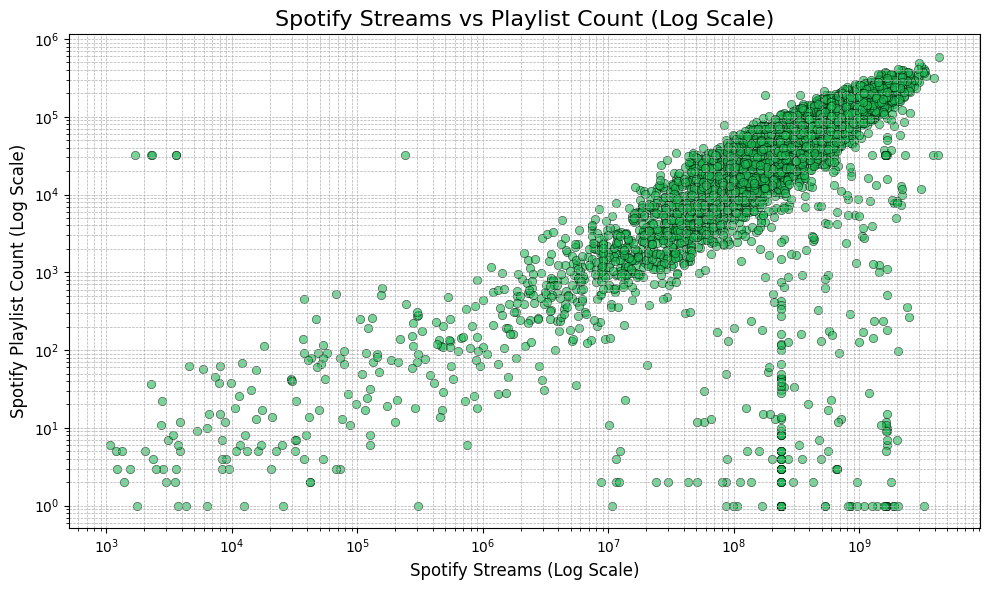

In [13]:
# Set the primary color (Spotify Green)
primary_color = '#1DB954'

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Use log scale for both axes due to the heavily skewed and large values
sns.scatterplot(
    x='Spotify Streams',
    y='Spotify Playlist Count',
    data=df,
    color=primary_color,
    alpha=0.6,
    edgecolor='black',
    linewidth=0.5
)

# Set scales to log
plt.xscale('log')
plt.yscale('log')

plt.title('Spotify Streams vs Playlist Count (Log Scale)', fontsize=16)
plt.xlabel('Spotify Streams (Log Scale)', fontsize=12)
plt.ylabel('Spotify Playlist Count (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()
#plt.savefig('streams_vs_playlists_scatter.png')
plt.close()

The scatter plot (using a log scale) shows a strong positive correlation between Spotify Streams and Spotify Playlist Count.

- Songs with higher stream counts almost universally have higher playlist counts.

- The data points generally follow a diagonal band, indicating that being frequently added to playlists is a primary mechanism for achieving high stream numbers.

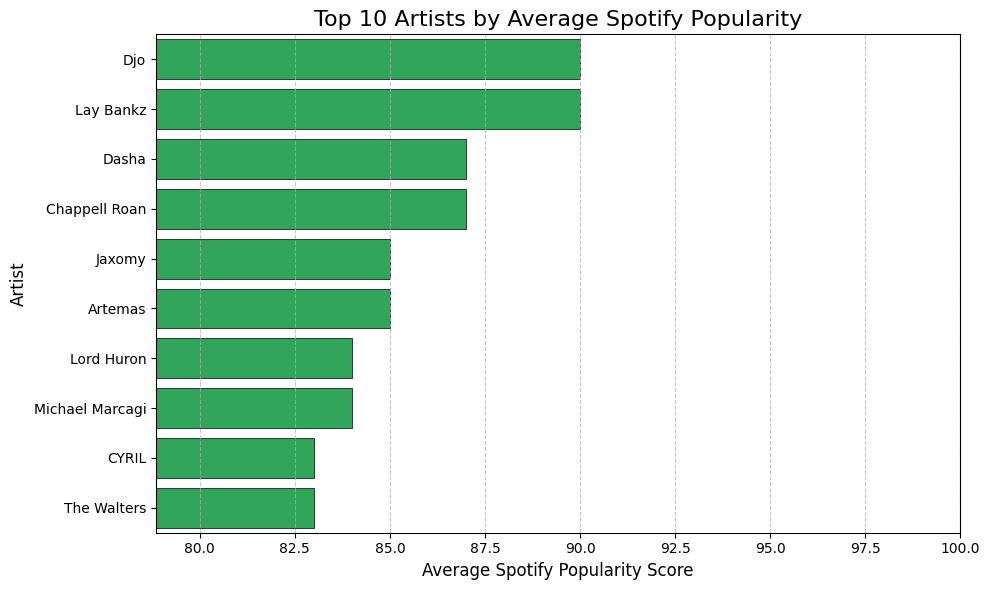

In [14]:
primary_color = '#1DB954'

# --- 1. Aggregate: Calculate mean Spotify Popularity per Artist ---
artist_popularity = df.groupby('Artist')['Spotify Popularity'].mean().reset_index()

# --- 2. Select Top 10 by Popularity ---
top_10_popularity = artist_popularity.sort_values(
    by='Spotify Popularity',
    ascending=False
).head(10)

# --- 3. Create the Bar Chart (Matplotlib/Seaborn) ---
plt.figure(figsize=(10, 6))
sns.barplot(
    y='Artist',
    x='Spotify Popularity',
    data=top_10_popularity,
    color=primary_color,
    edgecolor='black',
    linewidth=0.5
)

plt.title('Top 10 Artists by Average Spotify Popularity', fontsize=16)
plt.xlabel('Average Spotify Popularity Score', fontsize=12)
plt.ylabel('Artist', fontsize=12)
# Set max x-limit to 100 since Popularity is capped at 100
plt.xlim(top_10_popularity['Spotify Popularity'].min() * 0.95, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#plt.savefig('top_10_artists_popularity_bar.png')
plt.close()

/tmp/ipykernel_183171/973262726.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



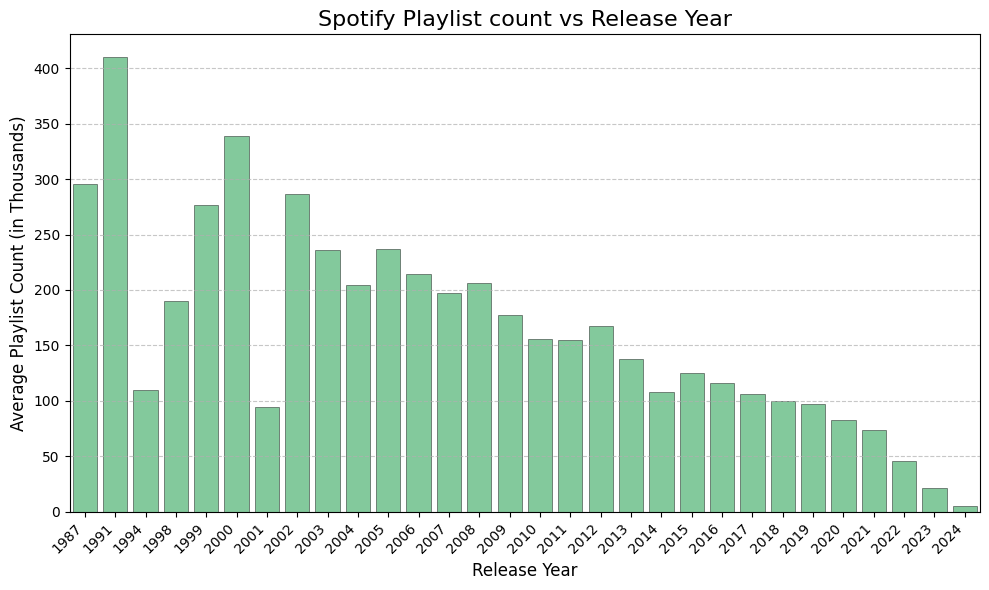

In [15]:
primary_color = '#1DB954'
mean_playlist_count = df.groupby('Release Year')['Spotify Playlist Count'].mean().reset_index()
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Release Year',
    y='Spotify Playlist Count',
    data=mean_playlist_count,
    color=primary_color,
    alpha=0.6,
    edgecolor='black',
    linewidth=0.5
)

plt.title('Spotify Playlist count vs Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Playlist Count (in Thousands)', fontsize=12)

current_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(tick / 1000):,}' for tick in current_ticks])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()